# Projet Final Chaînes de Markov
## Vitesse de convergence de l'algorithme de Metropolis-Hastings
Elève: Leonardo MARTINS BIANCO

## Introduction
Dans ce projet, on étudie des aspects théoriques du temps de mélange de l'algorithme de Metropolis, et à la fin on implémente de manière pratique une simulation de en utilisant ce que l'on a développé en cours et dans les questions.  

(p.s. désolé pour mon français mauvais)

## Partie 1: Forme générale de l'algorithme de Metropolis-Hastings

### Question 1
Soit $x \in \mathfrak{X}$ fixé. Alors on vérifie
$$
\sum_{y \in \mathfrak{X}} P(x, y) = \sum_{y \in \mathfrak{X} \atop y \neq x} A(x, y) Q(x, y)+ Q(x, x)+\sum_{x \neq y}(1-A(x, y)) Q(x, y) 
$$
$$
= \sum_{y \in \mathfrak{X} \atop y \neq x} A(x, y) Q(x, y)+Q(x, x) +\sum_{x \neq y} Q(x, y)-\sum_{x \neq y} A(x, y) Q(x, y)
$$
$$
= Q(x, x)+\sum_{y \neq x} Q(x, y)=1
$$
car $Q$ est bien une matrice stochastique. Alors, $P$ est bien une matrice stochastique.

### Question 2 
Rappelons nous qu'une mesure $\mu$ est dite réversible pour $P$ si pour tout couple d'états $(x, y) \in \mathfrak{X}^2$
$$
\mu(x) P(x, y)=\mu(y) P(y, x)
$$
Or, on a deux cas: $(x, y) \in \mathfrak{X}^2$ avec $y \neq x$, et $(x,y) \in \mathfrak{X}^2$ avec $y =x$, c'est-à-dire, $(x, x)$. Pour le premier cas,
$$
P(x, y)=A(x, y) Q(x, y)=\frac{S(x, y)}{1+T(x, y)} Q(x, y)
$$
Si $Q(x,y) > 0$, alors
$$
P(x, y)=\frac{S(x, y)}{1+\frac{\pi(x) Q(x, y)}{\pi(y) Q\left(y, x\right)}} Q(x, y)
$$
On calcule aussi
$$
P(y, x)=A(y, x) Q(y, x)
$$
Par l'hypothèse simplificatrice, $Q(y, x) > 0$. Alors 
$$
P(y, x)=\frac{S(y, x)}{1+\frac{\pi(y) Q(y, x)}{\pi(x)Q(x, y)}}  Q(y, x) = P(y, x)=\frac{S(x, y)}{1+\frac{\pi(y) Q(y, x)}{\pi(x)Q(x, y)}}  Q(y, x)
$$
Alors, $\pi(x) P(x, y)=\pi(y) P(y, x)$ si et seulement si
$$
\frac{\pi(x) S(x, y)}{1+\frac{\pi(x) Q(x, y)}{\pi(y) Q(y, x)}}  Q(x, y) = \frac{\pi(y) S(x, y)}{1+\frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)}}  Q(y, x)
$$
C'est-à-dire, si et seulement si 
$$
\frac{\pi(x) Q(x, y)}{\pi(y) Q(y, x)+\pi(x) Q( x, y)}  \pi(y) Q(y, x) = \frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)+\pi(y) Q(y, x)}  \pi(x) Q(x, y)
$$
Cette égalité est évidemment vraie.
Si $Q(x,y) = 0$, par l'hypothèse simplificatrice $Q(y,x) = 0$ et
$$
\pi(x) P(x, y)=0=\pi(y) P(y, x)
$$
car $P(x, y) = A(x,y)Q(x,y)$.

Donc on conclut que $\pi$ est réversible (alors invariante) pour $P$.

### Question 3
On a vu qu'un critère d'irreductibilité est que
$$
\forall(x, y) \in{\mathfrak{X}}^{2}, \exists n \in \mathbb{N} : \quad P^{n}(x, y)>0.
$$

Or, si $y \neq x$, alors
$$
P^{n}(x, y)=\sum_{x_{1}, \cdots, x_{n-1}} P\left(x, x_{1}\right) P\left(x_{1}, x_{2}\right) \ldots P\left(x_{n-1}, y\right)
$$
On peut assumer tous les pas intermédiaires différents. Alors
$$
=\sum_{x_{1}, \cdots, x_{n-1}}\left[\frac{S\left(x, x_{1}\right)}{1+T\left(x, x_{1}\right)} Q\left(x_{1} x_{1}\right)\right] \left[\frac{S\left(x_{1}, x_{2}\right)}{1+T\left(x_{1}, x_{2}\right)} Q\left(x_{1}, x_{2}\right)\right] \dots
$$
Comme $1 + T > 0$, il suffit de vérifier
$$
\sum_{x_{1}, \cdots, x_{n-1}} S\left(x, x_{1}\right)  S\left(x_{1}, x_{2}\right) \ldots S\left(x_{n-1}, y\right)Q\left(x, x_{1}\right) \cdots Q\left(x_{n-1}, y\right) > 0
$$
Or, $Q$ est irréductible. Alors il existe un terme $\tilde{x}_1, \dots, \tilde{x}_{n-1}$ avec $Q(x, \tilde{x}_{1}) \dots, Q(\tilde{x}_{n-1}, y) > 0$.

Donc si $S$ satisfait aussi que $S(x, \tilde{x}_1) \dots S(\tilde{x}_{n-1}, y) > 0$, alors $P$ est irréductible. Il suffit demander que $Q(x,y) > 0 \implies S(x,y) > 0$ pour avoir l'irréductibilité de $P$.

Pour l'apériodicité, on a vu (remarque 3.17 du poly) que pour une chaîne irréductible, une condition suffisante pour l'apériodicité est l'existence d'un état $x \in \mathfrak{X}$ tel que $P(x,x) > 0$. Or
$$
P(x,x) = Q(x,x) + \sum_{x \neq y} (1 - A(x,y)) Q(x,y) = Q(x,x) + \sum_{x \neq y} (1 - \frac{S(x,y)}{1+T(x,y)})Q(x,y)
$$
On ne sait pas si $Q(x,x) > 0 \forall x \in \mathfrak{X}$, mais si l'on demande que $A(x,y) < 1$ pour quelque $(x,y) \in \mathfrak{X}^2$ tel que $Q(x,y) > 0$, alors on aura l'apériodicité. De façon plus simple, on peut demander $A(x,y) < 1$ pour tout paire $(x,y)$. Ainsi, la condition $S(x,y) < 1 + T(x,y)$ implique apériodicité.

### Question 4
C'est un calcul simple:
$$
A=\frac{S(x, y)}{1+T(x, y)}
$$
Si $Q(x,y) = 0$, alors $T(x,y) = 0$ et $A(x,y) = S(x,y) = 1 + \text{min}(T(x,y), T(y,x)) = 1$ (l'hypothèse simplificatrice implique que $Q(x,y) = 0 \implies Q(y,x) = 0$).

Si $Q(x,y) > 0$, alors
$$
A(x, y)=\frac{1+\min (T(x, y), T(y, x))}{1+\frac{\pi(x) Q(x, y)}{\pi(y) Q(y, x)}}
$$

Si $\min (T(x, y), T(y, x))=T(x, y)$, alors
$$
A(x,y) = \frac{1+\frac{\pi(y) Q\left(y, x\right)}{\pi(x) Q(x, y)}}{1+\frac{\pi(x) Q(x, y)}{\pi(y) Q(y, x)}} = \frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)}  \frac{\pi(x) Q(x, y)+\pi(y)Q(y, x)}{\pi(y) Q(y, x)+\pi(x) Q(x, y)} = \frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)}
$$

On montre que $\min (T(x, y), T(y, x))=T(y, x)$ si et seulement si $\frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)}<1$. Or, cette minimalité signifie $T(y,x) < T(x,y)$. Alors, $\frac{T(y,x)}{T(x,y)} < 1$, i.e., 
$$
\left(\frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)}\right)^{2}<1 \Leftrightarrow \frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)}<1
$$

Alors, comme $1$ est exactement le résultat obtenu dans le premier cas, on voit qu'on peut écrire $A(x,y)$ de la manière suivante:
$$
A(x, y)=\left\{\begin{array}{l}
\min \left(1, \frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)}\right) \quad \text{si } Q(x,y) > 0\\
1 \quad \text{sinon}
\end{array}\right.
$$

On voit que si $\pi$ est réversible pour $Q$, c'est-à-dire, $\forall (x, y) \in \mathfrak{X}^2$, $\pi(x) Q(x, y)=\pi(y) Q(y, x)$, alors $A(x, y) \equiv 1$ et donc $P = Q$.

Maintenant on assume $Q$ irréductible apériodique. On voit que $S(x,y) > 0, \forall (x, y) \in \mathfrak{X}^2$, et donc $S(x,y) > 0$ pour tout $(x,y)$ tels que $Q(x,y) > 0$. On a montré avant que cela implique irréductibilité. On a déjà montré que $\pi$ est une mesure réversible. On voit à partir de la description dans l'énonce de la dynamique de la chaîne de Markov associée à $P$ que si $Q$ est apériodique, $P$ doit être aussi apériodique.

## Partie 2: Vitesse de convergence et forme de Dirichlet

### Question 5
Cherchons une expression pour $[ (I - P)f ](x)$:
$$
(I-P) \cdot f(x)=\sum_{y \in \mathfrak{X}}(I-P)_{x y} f(y) = \sum_{y \in \mathfrak{X}}(\delta_{x y}-P(x, y)) f(y)
$$
Alors
\begin{align*}
\mathscr{E}(f) &=\sum_{x \in \mathfrak{X}} \pi(x)  f(x) \sum_{y \in \mathfrak{X}}(\delta_{x y}-P(x, y)) f(y) \\
&=\sum_{x, y \in \mathfrak{X}} \pi(x) f(x) f(y)(\delta_{x y}-P(x, y)) \\
&=\frac{1}{2} \sum_{x, y \in \mathfrak{X}} \pi(x) 2 f(x) f(y)(\delta_{x y}-P(x, y))
\end{align*}
Mais on peut écrire $2 f(x) f(y)=-(f(x)-\left.f(y))^{2}+f(x)^{2}+f(y)^{2}\right.$. Alors l'expression dessus devient
$$
-\frac{1}{2} \sum_{x, y \in \mathfrak{X}} \pi(x)(f(x)-f(y))^{2}(\delta_{x y}-P(x, y)) + \frac{1}{2} \sum_{x, y} \pi(x)(f(x)^2 + f(y)^2)(\delta_{xy} - P(x,y))
$$

Dans la première somme, si $x = y$, $f(x) - f(y) = 0$. Donc il reste seulement les termes $x \neq y$, qui ont $\delta_{xy} = 0$:
$$
\frac{1}{2} \sum_{x, y \in \mathfrak{X}} \pi(x)(f(x)-f(y))^{2} P(x, y) + \frac{1}{2} \sum_{x,y} \pi(x)\left(f(x)^{2}+f(y)^{2}\right)\left(\delta_{x y}-P\left(x, y\right)\right)
$$

On voit maintenant que
\begin{align*}
& \frac{1}{2} \sum_{x,y} \pi(x)\left(f(x)^{2}+f(y)^{2}\right)\left(\delta_{x y}-P\left(x, y\right)\right) \\
& = \frac{1}{2} \sum_{x y} \pi(x) f(x)^{2}\left(\delta_{xy}-P(x, y)\right) + \frac{1}{2} \sum_{x y} \pi(y) f(y)^{2}\left(\delta_{xy}-P(y, x)\right) \\
& = \sum_{x} \pi(x) f(x)^{2} \underbrace{\sum_{y}(\delta_{x y}-P(x, y))}_{= \ 0}
\end{align*}

Alors ce terme vaut zéro. On cherche maintenant une relation entre $\mathscr{E}(f)$ et $\mathscr{E}(f + c)$:
\begin{align*}
\mathscr{E}(f + c) &= \frac{1}{2} \sum_{x, y \in \mathfrak{X}} \pi(x) P(x, y) \left((f(x)+c)-(f(y)+c)\right)^{2} \\
& = \frac{1}{2} \sum_{x ,y \in \mathfrak{X}} \pi(x) P(x, y)(f(x)-f(y))^{2}=\mathscr{E}(f)
\end{align*}

Ça-veut-dire, l'énérgie de Dirichlet ne change pas si l'on ajoute un terme constante au système, pareil au cas de l'énérgie physique.

### Question 6
On doit montrer que la fonction constante égale à $1$ est une fonction propre de $P$ avec valeur propre $\lambda_1 = 1$. Or,
$$
\left(P \cdot f_{1}\right)_{x}=\sum_{y} P(x, y) 1=1
$$
C'est-à-dire, $P \cdot f_1 = f_1$.

On a supposé que la base $(f_1, \dots, f_N)$ est orthonormée. Donc, $\forall j \in \{ 2, \dots, N\}, \langle f_1, f_j \rangle_{\pi} = 0$. Cela implique
$$
\sum_{x \in \mathfrak{X}} f_{1}(x) f_{j}(x) \pi(x)=\sum_{x \in \mathfrak{X}} f_{j}(x) \pi(x)=0
$$

Cela signifie que les fonctions $f_2, \dots, f_N$ ont moyenne nulle sous $\pi$.

### Question 7
D'abord, soit $f$ une fonction constante. Alors
$$
\pi(f)=\sum_{x \in \mathfrak{X}} \pi(x) f(x)=f \sum_{x \in \mathfrak{X}} \pi(x)=f
$$
Ainsi, $f(x) - \pi(f) = 0$ et on voit facilement que $\operatorname{Var}_{\pi}(f) = 0$.

Maintenant, supposons que $\operatorname{Var}_{\pi}(f) = 0$:
$$
\sum_{x \in \mathfrak{X}} \pi(x)(f(x)-\pi(f))^{2}=0
$$
Chaque terme est positif, alors tous doivent être zéro: $\forall x \in \mathfrak{X}$,
$$
\pi(x)(f(x)-\pi(f))^{2}=0
$$

On a assumé au début que $\pi(x) > 0, \forall x \in \mathfrak{X}$. Alors
\begin{align*}
(f(x) - \pi(f))^2 &\iff f(x) - \pi(f) = 0 \\
&\iff f(x) = \pi(f), \forall x \in \mathfrak{X} 
\end{align*}

Mais $\pi(f)$ est une constante. Alors $f$ est constante.

Maintenant, soit $f: \mathfrak{X} \rightarrow \mathbb{R}$ non-constante. On peut écrire
$$
f = \sum_{i=1}^N c_i f_i
$$
où $c_i = \langle f, f_i \rangle_{\pi}$. Notons que $c_1 = \pi(f)$. Ça-veut-dire, 
$$
f = \pi(f) + c_2 f_2 + \sum_{i = 3}^N c_i f_i
$$
En appliquant $P$ à cette relation, et en utilisant un exercice précédent ($\pi$ invariante):
$$
P f=\pi(f)+\lambda_{2} c_{2} f_{2}+\sum_{i=3}^{N} \lambda_{i} c_{i} f_{i}
$$
Ainsi,
\begin{align*}
\mathscr{E}(f) &= \langle f-P f \mid f\rangle_{\pi} \\
&= \left.\left\langle\pi (f)+c_{2} f_{2}+\cdots\right)-(\pi(f)+\lambda_{2} c_{2} f_{2}+\cdots\right)|f\rangle_{\pi} \\
&= \left\langle\left(1-\lambda_{2}\right) c_{2} f_{2}+\left(1-\lambda_{3}\right) c_{3} f_{3}+\cdots \mid \sum f_{i} c_{i}\right\rangle
\end{align*}
Ainsi,
$$
\mathscr{E}(f) = \left(1-\lambda_{2}\right)c_2^2+\left(1-\lambda_{3}\right) c_{3}^{2}+\cdots
$$
et
$$
\frac{\mathscr{E}(f)}{c_2^2} = \left(1-\lambda_{2}\right)+\left(1-\lambda_{3}\right) \frac{c_{3}^{2}}{c_{2}^{2}}+\cdots
$$
Mais $\left(1-\lambda_{2}\right)<\left(1-\lambda_{j}\right)$, et on obtient la borne suivante:
$$
\frac{\mathscr{E}(f)}{\left(c_{2}^{2}+c_{3}^{2}+\ldots\right)}>{\left(1-\lambda_{2}\right)}
$$

Maintenant, on observe que
\begin{align*}
\operatorname{Var}_{\pi}(f) &=\sum_{x} \pi(x)(f(x)-\pi(f))^{2} \\
&=\langle f(x)-\pi(f), f(x)-\pi(f) \rangle \\
&= \left\langle c_{2} f_{2} + \ldots+c_{N} f_{N}, c_{2} f_{2}+\ldots+c_{N} f_N\right\rangle \\
&= c_{2}^{2}+\cdots+c_{N}^{2}
\end{align*}

Alors on a établi
$$
1-\lambda_{2}<\frac{\mathscr{E}(f)}{\operatorname{Var}_{\pi}(f)}
$$

Montrons que c'est l'infimum. Prenons $f = f_2$; or, $f_2$ n'est pas constante, sinon elle serait multiple de $f_1$.
\begin{align*}
& \mathscr{E}\left(f_{2}\right)=\left \langle(I-P) f_{2}\left|f_{2}\right\rangle_{\pi}=\left(1-\lambda_{2}\right)\right. \\
& \operatorname{Var}_{\pi}\left(f_{2}\right)=\left\langle f_{2}-\pi\left(f_{2}\right), f_{2}-\pi\left(f_{2}\right)\right\rangle_{\pi} = \langle f_2 , f_2 \rangle_{\pi} = 1
\end{align*}
car la base est orthonormée et on a montré précédemment que $\pi(f_j) = 0$ si $j \geq 2$. Alors la borne est atteinte est on conclut que c'est bien l'infimum.

### Question 8
Comme $\mathfrak{X}$ est fini, toutes les fonctions $f_i$ atteignent son maximum en quelque $x \in \mathfrak{X}$; soit $x \in \mathfrak{X}$ tel que $\left|f_i (x) \right|$ soit maximal. Or
$$
P \cdot f_i = \lambda_i f_i
$$
et cela peut être réécrit comme
$$
\left({P} f_{i}\right)(x) = \sum_{y} P(x, y) f_{i}(y)=\lambda_{i} \underbrace{f_{i}(x)}_{\text {max. }}
$$
i.e., 
$$
\left(P(x, x)-\lambda_{i}\right) f_{i}(x)+\sum_{y \neq x}(P(x,y)f_i(y))=0
$$
$$
\left(\lambda_{i}-P(x, x)\right) f_{i}(x)=\sum_{y \neq x} P(x, y) f_{i}(y)
$$
et ici, si l'on prend la valeur absolute dans cette égalité et en utilisant la maximalité de $f_i(x)$, on obtient la borne
$$
\left|\lambda_{i}-P\left(x, x\right)\right|\left|f_{i}(x)\right| \leq \left|\sum_{y \neq x} P(x, y) \right| \left| f_{i}(x) \right|
$$
Le fait que $P$ est stochastique implique que l'on peut réécrire $\sum_{y \neq x} P(x, y)=1-P(x, x)$, et alors $\left|\lambda_{i}-P(x, x)\right| \leqslant \mid-P(x, x)$. On déduit immédiatement 
\begin{align*}
\left|\lambda_{i}-P\left(x,x\right)\right| \leq 1-P(x, x) &\iff \\
-1+P(x, x) \leq \lambda_{i}-P(x, x) \leq 1 - P(x, x) &\iff \\
P(x, x) \leq \lambda_{i}-P(x, x)+1 \leqslant 2-P(x, x) &\iff \\
2 P(x, x) \leq 1+\lambda_{i} \leq 2
\end{align*}
En particulier, $\exists x \in \mathfrak{X}$ tel que $2 P(x, x)<1+\lambda_N$. Donc évidemment
$$
2 \min _{x \in x} P(x, x) \leq 1+\lambda_{N}
$$

## Partie 3: Simulation d'une loi à décroissance exponentielle

### Question 9
On a montré que les coefficients d'acceptation s'écrivent
$$
A(x, y)=\left\{\begin{array}{ll}
\min (1, \frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)} & \text { si } Q(x, y)>0 \\
1 & \text { sinon }
\end{array}\right.
$$
Commençons avec le cas $x \neq y$. Il y a deux possibilités:
$$
\left|x - y \right| \quad \text{ ou } \quad \left|x - y \right| > 1
$$
Si $\left|x-y\right| = 1$, alors
$$
Q(x, y) = Q(y, x) = \frac{1}{2} > 0
$$
Ainsi,
$$
A(x,y) = \min \left(1, \frac{\pi(y) Q(y, x)}{\pi(x) Q(x, y)}\right)=\min \left(1, \frac{\pi(y)}{\pi(x)}\right)
$$

Maintenant, on reconnaît deux cas possibles: $y = x+1$ ou $y = x-1$. Dans le premier, $\frac{\pi(y)}{\pi(x)} < 1$ (car $\pi$ est décroissante). Alors
$$
A(x, x+1)=\frac{\pi(x+1)}{\pi(x)}=a^{h(x+1)-h(x)}
$$

Par contre, si $y = x-1$, alors $A(x, x-1) = 1$, et donc si $x \geq 2$
$$
P(x, x- 1) = A(x, x-1) Q(x, x-1) = \frac{1}{2}
$$

On analyse maintenant le cas $\left|x - y\right| > 1$. Or, dans ce cas $Q(x,y) = 0$ et donc $P(x,y) = 0$.

Analysons le cas $y = x$. Alors il y a trois cas à vérifier: $x = 1$, $x = N$, ou $2 \leq x \leq N - 1$. D'abord, si $x = 1$, $Q(x,x) = \frac{1}{2}$ et on utilise les résultats précédents:
\begin{align*}
P(1,1) &= Q(1,1) + (1 - A(1,2))Q(1,2) \\
&= \frac{1}{2} + (1 - a^{h(2) - h(1)})\frac{1}{2} = 1 - \frac{a^{h(2) - h(1)}}{2}
\end{align*}

Maintenant, si $x = N$, $Q(N,N) = \frac{1}{2}$, et comme dessus,
\begin{align*}
P(N,N) &= Q(N,N) + (1 - A(N, N-1))Q(N, N-1) \\
&= \frac{1}{2} + (1 - 1)\frac{1}{2} = \frac{1}{2}
\end{align*}

Finalement, si $2 \leq x \leq N-1$,
\begin{align*}
P(x,x) &= Q(x,x) + (1 - A(x, x-1))Q(x, x-1) + (1 - A(x,x+1))Q(x, x+1)
&= \frac{1 - a^{h(x+1) - h(x)}}{2}
\end{align*}

### Question 10
On a déduit précédemment l'inégalité $1 + \lambda_N \geq 2 \operatorname{min}_{x \in \mathfrak{X}} P(x,x)$. Dans ce cas là, on voit facilement que 
$$
\frac{1 - a^{h(x+1) - h(x)}}{2} < \frac{1}{2}
$$
c'est-à-dire, $P(x,x) < P(N,N), 2 \leq x \leq N - 1$. Or, $a^{h(x+1) - h(x)}$ est décroissante, alors $P(x+1, x+1) > P(x,x)$ pour $2 \leq x \leq N-2$. Donc on doit juste comparer $P(1,1)$ et $P(2,2)$ pour trouver le minimum.
\begin{align*}
P(1,1) &= 1 - \frac{a^{h(2) - h(1)}}{2} \\
P(2,2) &= \frac{1}{2} - \frac{a^{h(2) - h(1)}}{2}
\end{align*}
Alors $\operatorname{min}_{x \in \mathfrak{X}} P(x,x) = P(2,2)$. Ainsi,
$$
\begin{array}{l}
1+\lambda_{N} \geqslant 2 \left(\frac{1}{2}-\frac{a^{h(2)}-h(1)}{2}\right) \\
1+\lambda_{N} \geqslant 1-a^{h(2)-h(1)}
\end{array}
$$
i.e., $\lambda_{N} \geqslant-a^{h(2)-h(1)}$. On obtient la chaîne d'implications
$$
h(2)-h(1) \geqslant 1 \Rightarrow a^{h(2)-h(1)} \leqslant a \Rightarrow-a^{h(a)-h(1)} \geqslant-a
$$
C'est-à-dire, $\lambda_{N} \geqslant-a$.

### Question 11
Montrons d'abord l'égalité pour la variance. Par définition,

\begin{align*}
\operatorname{Var}_{\pi}(f) &= \sum_{x \in \mathfrak{X}} \pi(x)(f(x)-\pi(f))^{2} \\
&= \sum_{x \in \mathfrak{X}} \pi(x)\left(f(x)-\sum_{y \in x} f(y) \pi(y)\right)^{2} \\
&= \sum_{x \in \mathfrak{X}} \pi(x)\left(f(x)^2+\left(\sum_{y \in \mathfrak{X}} f(y) \pi(y)\right)^2 - 2\sum_y f(x) f(y) \pi (y)\right)
\end{align*}

Mainenant on utilise une petite astuce, en remarquant que $1 = \sum_y \pi(y)$. On écrit alors

\begin{align*}
&= \sum_{x \in \mathfrak{X}} \pi(x)\left(\sum_y \pi(y) f(x)^2-2 \sum_y f(x) f(y) \pi(y)+\pi(f)^2\right) \\
&= \sum_{x \in \mathfrak{X}} \pi(x)\left(\sum_y \pi(y)\left(f(x)^2-2 f(x ) f(y))+\pi(f)^2\right)\right.
\end{align*}

On "complète le carré" (désolé, je ne suis pas sûr si cette expréssion est utilisée en français), et l'égalité devient:
$$
\sum_{x \in \mathfrak{X}} \pi(x) (\sum_{y} \pi(y)(f(x)-f(y))^{2}- \underbrace{ \sum_{y} \pi(y) f(y)^{2}+\pi(f)^{2} }_{\operatorname{Var}_{\pi}(f)} )
$$
d'où on conclut
$$
\operatorname{Var}_{\pi}(f) = \frac{1}{2} \sum_{x \neq y \in \mathfrak{X}} \pi(x) \pi(y)(f(x)-f(y))^{2}
$$

On passe aux inégalités. On note la somme telescopique:
$$
f(x) - f(y) = \sum_{e \in \gamma_{x,y}} f(e_{-}) - f(e_{+})
$$
On la divise par $c(e)^{\frac{1}{4}}$:
$$
f(x) - f(y) = \sum_{e \in \gamma_{x,y} } \frac{1}{c(e)^{1 / 4}}  c(e)^{1 / 4}\left(f(e_{-})-f\left(e_{+}\right)\right)
$$
Après, on utilise l'inégalité de Cauchy-Schwarz:
$$
f(x) - f(y) \leq \left(\sum_{e \in \gamma_{x, y}} \frac{1}{c(e)^{\frac{1}{2}}}\right)^{1 / 2} \left( \sum_{e \in \gamma_{x,y}} c(e)^{\frac{1}{2}}(f\left(e_{-}\right)-f\left(e_{+}\right))^{2}\right)^{\frac{1}{2}}.
$$
Et donc
$$
(f(x) - f(y))^2 \leq \underbrace{\left(\sum_{e \in \gamma_{x, y}} \frac{1}{c(e)^{\frac{1}{2}}}\right)}_{D(x,y)} \left( \sum_{e \in \gamma_{x,y}} c(e)^{\frac{1}{2}}(f\left(e_{-}\right)-f\left(e_{+}\right))^{2}\right).
$$
Alors,
\begin{align*}
\operatorname{Var}_{\pi}(f) &= \frac{1}{2} \sum_{x \neq y} \pi(x) \pi(y)(f(x)-f(y))^{2} \\
&\leq \leqslant \frac{1}{2} \sum_{x \neq y} \pi(x) \pi(y) D(x, y) \left( \sum_{e \in \gamma_{x,y}}c(e)^{1 / 2}\left(f(e_{-})-f(e_{+}))^{2}\right.\right) 
\end{align*}
Cela est la première inégalité.

On note que pour chaque $x \neq y$ fixées, chaque arête $e \in \gamma_{x,y}$ est sommée une seule fois. Ça-veut-dire, sommer les arêtes $e \in \gamma_{x,y}$ pour tout $x \neq y$ possible est equivalent à smomer tous les $x \neq y$ possibles pour chaque arête $e$ (c'est-à-dire, une somme sur tous les $x \neq y$ tels que $e \in \gamma_{x,y}$). Ainsi, 
\begin{align*}
&\frac{1}{2} \sum_{x \neq y} \pi(x) \pi(y) D(x, y)\left(\sum_{e \in \gamma_{x, y}} c(e)^{1 / 2} (f\left(e_{-}\right)-f\left(e_{+} )\right)^{2}\right) \\
= &\frac{1}{2} \sum_{x \neq y} \sum_{e \in \gamma_{x,y}} \pi(x) \pi(y) D(x, y) c(e)^{1 / 2}\left(f\left(e_{-}\right)-f\left(e_{+}\right)\right)^{2} \\
= &\frac{1}{2} \sum_{e \in \gamma_{x,y}} \sum_{x,y | e} \pi(x) \pi(y) D(x, y) c(e)^{1 / 2}\left(f\left(e_{-}\right)-f\left(e_{+}\right)\right)^{2} \\
= & \frac{1}{2} \sum_{e}\left(c(e)^{1 / 2}\left(f\left(e_{-}\right)-f\left(e_{+}\right)\right)^{2}\right) \left(\sum_{x, y \mid e \in \gamma_{x,y}} \pi(x) \pi(y) D(x, y)\right)
\end{align*}

On peut écrire $c(e)^{\frac{1}{2}} = \frac{c(e)}{c(e)^{\frac{1}{2}}}$ et conclure
$$
\operatorname{Var}_\pi(f)\leq\sum_{e} c(e)\left(f\left(e_{-}\right)-f\left(e_{+}\right)\right)^{2}\left(\frac{1}{c(e)^{1 / 2}} \sum_{x,y | e} \pi(x) \pi(y) D(x, y)\right)
$$
On avait trouvé
$$
1-\lambda_{2} = \inf \{\frac{\mathscr{E}(f)}{\operatorname{Var}_{\pi}(f)}\mid f \text { non constante }\}
$$
Mais selon l'inégalité dessus
$$
\frac{1}{1-\lambda_{2}} \leqslant \frac{1}{\mathscr{E}(f)}  \frac{1}{2} \sum_{e} c(e)\left(f(e_{-})-f(e_{+}))^{2}\right. \left(\frac{1}{c(e)^{1 / 2}} \sum_{x, y l e} \pi(x) \pi(y) D(x, y)\right)
$$
On observe que
$$
\frac{1}{2} \sum_{e} c(e)\left(f(e_{-})-f(e_{+}))^{2}\right. \left(\frac{1}{c(e)^{1 / 2}} \sum_{x, y l e} \pi(x) \pi(y) D(x, y)\right) \\
\leqslant \max \left(\frac{1}{c(e)^{1 / 2}} \sum_{x y | e} \pi(x) \pi(y) D(x, y)\right) \sum_{e} c(e)\left(f(e_{-})-f\left(e_{+}\right)\right)^{2}
$$
Alors
$$
\frac{1}{1-\lambda_{2}} \leqslant \frac{1}{\mathscr{E}(f)}  \frac{1}{2} \left(\sum_{e} c(e)\left(f\left(e_{-}\right)-f(e_{+}))^{2}\right)\right. \max \left(\frac{1}{c(e)^{1 / 2}} \sum_{x, y | e} \pi(x) \pi(y) D(x, y)\right)
$$
Mais 
$$
\mathscr{E}(f)=\frac{1}{2} \sum_{x, y} c(x, y)(f(x)-f(y))^{2} > \frac{1}{2} \left(\sum_{e} c(e)(f(e_{-})-f(e_{+}))^{2}\right)
$$
car il y a strictement plus termes. Alors on établit
$$
\frac{1}{1-\lambda_{2}} \leqslant A = \max _{e}\left(\frac{1}{c(e)^{1 / 2}} \sum_{x,y | e} \pi(x) \pi(y) D(x, y)\right)
$$

### Question 12
Dans le cas specifié $c(e)=\pi(x) P(x, x+1)$ ou $c(e)=\pi(x + 1) P(x+1, x)$. Pour $e = x \rightarrow x+1$, on peut utiliser la révérsibilité de $\pi$:
$$
\pi(x) P(x, x+1)=\pi(x+1) P(x+1, x)
$$
Alors dans les deux cas, $c(e) = \frac{\pi(x+1)}{2}$. Ainsi, pour tout couple $x < y$,
$$
D\left(x, y\right)=\sum_{k=x}^{y-1} \frac{1}{c\left(k, k+1\right)^{1 / 2}}=\left(\sum_{x}^{y-1} \frac{1}{\pi(k+1)^{1 / 2}}\right) \sqrt{2}
$$
Or,
$$
\pi(k+1)^{-1 / 2}=Z_{a}^{1 / 2}  a^{-\frac{h(k+1)}{2}} \implies D(x, y)=\sqrt{2}  Z_{a}^{1 / 2}  \sum_{k=x}^{y-1} a^{- \frac{h(k+1)}{2}}
$$
On continue les calculs...
$$
\sum_{k=x}^{y-1} a^{-\frac{h(k+1)}{2}}=a^{-\frac{h(y)}{2}} \sum_{k=x}^{y-1} a^{-\frac{h(k+1)}{2}+\frac{h ( y)}{2}}
$$
\begin{align*}
\therefore D(x, y)&=\sqrt{2} Z_{a}^{\frac{1}{2}} a^{-\frac{h (y)}{2}} \sum_{k=x}^{y-1} a^{\frac{-h(k+1)+h(y)}{2}} \\
&= \frac{\sqrt{2}}{\sqrt{\pi(y)}} \cdot \sum_{k=x}^{y-1} a^{\frac{-h(k+1)+h(y)}{2}}
\end{align*}

Maintenant on borne $\sum_{k=x}^{y-1}\left(a^{\frac{1}{2}}\right)^{-h(k+1)+h(y)}$ par une série géométrique. On note que l'on peut écrire
$$
-h(k+1)+h(y)=-h(k+1)+h(k+2)-h(k+2)+h(k+3) - h(k+3) + \dots + h(y)
$$
et alors on obtient
$$
\left(a^{\frac{1}{2}}\right)^{-h(k+1)+h(y)}=\left(a^{\frac{1}{2}}\right)^{h(y)-h(y-1)}\left(a^{1 / 2}\right)^{h(y-1)-h(y-2)} \dots \left( a^{\frac{1}{2}}\right)^{h(k+2) - h(k+1)}
$$
Mais $h(x)-h(x-1) \geqslant 1$ et donc $\left(a^{\frac{1}{2}}\right)^{h(\mu)-h(\mu-1)} \leqslant a^{\frac{1}{2}}$. On a $y - k - 1$ termes:
$$
\sum_{k=x}^{y-1}\left(a^{\frac{1}{2}}\right)^{-h(k+1)+h(y)} \leqslant \sum_{k=x}^{y-1}\left(a^{\frac{1}{2}}\right)^{y-1-k}
$$
Pour simplifier les calculs, on note que $y - 1 - k$ vaut entre $0$ et $y - 1 - x$. Alors on introduit $\mu = y - 1 - k$ et donc
$$
\sum_{\mu=0}^{y-1-x}\left(a^{\frac{1}{2}}\right)^{\mu}=\frac{1-\left(a^{\frac{1}{2}}\right)^{y-x}}{1-a^{\frac{1}{2}}}
$$
en particulier, $ \leq \frac{1}{1-a^{1 / 2}}$, d'où
$$
D(x, y) \leq \frac{\sqrt{2}}{\pi(y)^{1 / 2}} \cdot \frac{1}{1-a^{1 / 2}}
$$

Cherchons la borne pour $A$. Or,
$$
A=\max _{e}\left(\frac{1}{(c(e))^{1 / 2}} \sum_{x, y \mid e \in \gamma_{x, y}} \pi(x) \pi(y) D(x, y)\right)
$$
On voit que le terme $\frac{1}{(c(e))^{1 / 2}}$ est un terme de la somme qui définit $D(x,y)$, et donc on a la borne
$$
A \leq \max _{e}\left(\sum_{x, y \mid e \in \gamma_{x, y}} \pi(x) \pi(y) D(x, y)^2 \right)
$$
et on a, par la borne précédente que 
$$
\pi(y)D(x,y)^2 \leq \frac{2}{(1 - a^{\frac{1}{2}})^2}
$$
d'où la borne (sachant que $\sum_{x | e} \pi(x) \leq 1$)
$$
A \leq \frac{2}{\left(1-a^{1 / 2}\right)^{2}}
$$

### Question 13
On doit vérifier que
$$
P=\min \left(1-\left|\lambda_{2}\right|,1-| \lambda_{N} \mid\right) \geqslant \frac{\left(1-a^{1 / 2}\right)^{2}}{2}
$$

Commençons par $\lambda_N \leq 0$. On a déjà montré $\lambda_N \geq -a$, c'est-à-dire, $\left| \lambda_N \right| \leq a \leq a^{\frac{1}{2}}$. Ainsi,
\begin{align*}
1-| \lambda_{N} | &\geqslant 1-a^{\frac{1}{2}} \\
&\geqslant \left(1-a^{\frac{1}{2}}\right)^{2} \\
&\geqslant \frac{\left(1-a^{\frac{1}{2}}\right)^{2}}{2}
\end{align*}

Ok, maintenant soit le cas $\lambda_2 \geqslant 0$:
\begin{align*}
1-|\lambda_{2} | = 1 - \lambda_2 \geqslant \frac{(1 - a^{\frac{1}{2}})^2}{2}
\end{align*}

Maintenant, soit $\lambda_N \geqslant 0$. Comme $\lambda_N \leqslant \lambda_2$, ça implique $\lambda_2 \geq 0$. Alors 
$$
1- |\lambda_N| = 1 - \lambda_N \geqslant 1 - \lambda_2 \geqslant \frac{(1 - a^{\frac{1}{2}})^2}{2}
$$

Finalement (!) soit $\lambda_2 \leqslant 0$. Alors comme $\lambda_N \leqslant \lambda_2$, $\lambda_N \leqslant 0$, et donc
$$
\frac{\left(1-a^{\frac{1}{2}}\right)^{2}}{2} \leqslant 1-\left|\lambda_{N}\right| \leq 1-\left|\lambda_{2}\right|
$$
Alors on vérifie en tout cas $\rho \geqslant \frac{\left(1-a^{1 / 2}\right)^{2}}{2}$.

### Question 14
Or, on observe dans la démonstration que si $x_0 = 1$ (dans la dernière ligne), alors $F(a) = \frac{1}{\pi(1)} - 1$. La remarque que cette quantité ne dépende pas de $N$ permet de la calculer pour $N = 2$ en particulier: 
$$
\pi(1)=\frac{a^{h(1)}}{a^{h(1)}+a^{h(2)}}
$$
En faisant les simplifications, on atteint l'expression $F(a) = a^{h(2) - h(1)}$.

En changeant le trou spectral dans le théorème C.8 par la borne que l'on a trouvé dans les exercices précédentes, on conclut que si l'on part de l'état initial $1$, alors $\pi_n$ vérifie:
$$
d_{TV}(\pi_n, \pi) \leq F(a)e^{- \rho(a) n}
$$

### Question 15
Le programme ci dessous fonctionne de la manière suivante: on prend l'espace d'états $\{1, 2, \dots\, 30\}$, une variable $\epsilon$ qui borne l'erreur de l'approximation de l'algorithme, une constante $a, 0 < a < 1$ et une fonction $h(x)$ ($x$ ou $x + \log(x)$ ici).

À partir de la question précédente, on peut calculer le nombre de pas $n$ nécéssaires pour simuler la chaîne de Markov construite dans les exercices précédentes de façon que l'erreur soit plus petite que la valeur $\epsilon$ donnée:
\begin{align*}
\varepsilon \leqslant F(a) e^{-\rho(a) n} &\implies \log \varepsilon \leqslant \log (F(a))-\rho(a) n \\
& \implies n \leqslant \frac{\log (F(a))-\log \varepsilon}{\rho^{a}}
\end{align*}

À partir de l'expression trouvé pour $F(a)$, on calcule:
$$
n = \frac{(h(2) - h(1))\log(a) - \log(\varepsilon)}{\rho(a)}
$$

La dynamique de la chaîne de Markov à simuler est donné de la façon suivante: on a calculé à la question 9 les probabilités de transition $P(x, x-1)$ (qui dans le code j'ai noté "P_avant"), $P(x,x)$ (qui j'ai noté "P_arrete"), et $P(x,x+1)$ (noté "P_devant") (oui, je comprends que c'est probablement une mauvaise notation, désolé). On prend une variable uniforme $u \in (0,1)$. Alors, si $u > P(x, x-1) =\frac{1}{2}$ on donne réalise la transition $x \rightarrow x-1$ (si possible, les cas extremaux sont traités dans le code). Si $u < P(x, x+1) = \frac{a^{h(x+1) - h(x)}}{2}$, alors on réalise la transition $x \rightarrow x+1$. Le cas qui reste est le cas où on reste en $x$: $x \rightarrow x$.

On prend juste l'état final, i.e., le n-ème état de la chaîne simulé, et on crée un échantillon avec ces états finaux (les états précédents ne sont pas valides pour approximer $\pi$). Finalement, pour donner une idée de la densité simulée, on graphe l'histogramme (en densité) des états finaux.

Finalement, on note que, oui, c'est possible calculer les valeurs $Z_a$ de la fonction de partition, mais ce n'est pas nécéssaire (et c'est un peu la motivation de la méthode, car calculer cette quantité peut être très couteux).

In [19]:
# Paramètres

# Définition de l'espace d'états
N = 30

# Définition de la constante a:
a = 0.5

# Vérification de la constante.
if a < 0 or a > 1:
    print("La constante a doit être entre zéro et un!")

# Définition de la fonction h(x):
def h(x):
    return x
   #return x + log(x)

# Définition de la borne inférieure du trou spectral:
def rho(a):
    return ((1 - a ** (1/2))** 2)/2

# Donner une tolérance désirée:
epsilon = 0.01

# Définition du nombre d'itérations nécéssaires pour une erreur donnée:
def nombre_iterations():
    return (((h(2) - h(1)) * log(a)) - log(epsilon))/(rho(a))

n = ceil(nombre_iterations())

In [20]:
# Définition des probabilités:
def P_avant(x):
    if x == 1:
        # La transition 1 --> 0 n'est pas possible.
        return 0
    else:
        return 1/2
    
def P_devant(x):
    if x == N:
        # La transition N --> N + 1 n'est pas possible.
        return 0
    else:
        return a ** ((h(x+1) - h(x))/2)

def P_arrete(x):
    if x == 1:
        return 1 - (a ** (h(2) - h(1)))/2
    elif x == N:
        return 1/2
    else:
        return (1 - a ** (h(x + 1) - h(x)))/2

In [21]:
# Dynamique
def dynamique():
    # On commence ici toujours à 1:
    etat = 1
    
    # Boucle d'évolution:
    for i in range(n):
        # Critère d'évolution: 
        u = random()
        
        # Cas extremal: etat = 1
        if etat == 1:
            if u < P_devant(1):
                etat += 1
        
        # Cas extremal: etat = N
        elif etat == N:
            if u < P_avant(N):
                etat -= 1
        
        # Cas intermédiaires
        else:
            if u > P_avant(etat):
                etat -= 1
            elif u < P_devant(etat):
                etat += 1
            else:
                etat = etat
    return etat

In [22]:
# Construction d'un k-échantillon
k = 1000
echantillon = []
for i in range(k):
    echantillon.append(dynamique())

In [23]:
# Représentation graphique des états finaux:
from sage.plot.histogram import Histogram
# Attention: bins = N montre la densité de chaque état.
# Si bins > N, il y aura des états vides dans l'histogramme.
graphe = histogram(echantillon, density=True, bins=30)

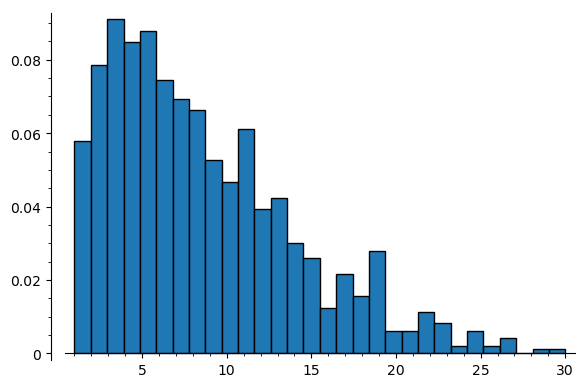

In [24]:
plot(graphe)

Pour obtenir le graphe pour $h(x) = x + log(x)$, il faut juste changer la fonction $h(x)$ dans le code dessus. Notons que ce cas prends plus longtemps pour executer.

### Conclusion
On conclut que en utilisant les outils théoriques développés en cours, c'est possible d'implémenter l'algorithme et obtenir des résultats en temps raisonnable. On voit aussi que l'on sait contrôler l'erreur à travers de l'étude de la vitesse de convergence, et du coup on conclut l'importance fondamentale des chaînes de Markov pour la simulation d'une variable aléatoire (échantillonage), un processus fondamentale en probabilités et statistiques.